# Survey Data Analysis using Random Foresting

Survey data analysis using Random Forest is a powerful approach to gain insights from complex datasets. Here's a brief overview:

## What is Random Forest?

Random Forest is an ensemble machine learning algorithm that combines multiple decision trees to improve the accuracy and robustness of predictions. It's widely used for classification and regression tasks.

## How does it work in survey data analysis?

In survey data analysis, Random Forest can be used to:
- Identify key drivers: Determine which survey questions or variables are most strongly associated with specific outcomes, such as customer satisfaction or employee engagement.
- Predict outcomes: Use survey data to predict future outcomes, like churn or purchase behavior.
- Segment audiences: Group respondents based on their responses to survey questions, helping to identify distinct segments or personas.

## Benefits
- Handles high-dimensional data with many variables
- Can handle missing values and outliers
- Provides feature importance scores to identify key drivers
- Can be used for both classification and regression tasks
- Common applications
- Customer satisfaction analysis
- Employee engagement analysis
- Market research and segmentation
- Predicting churn or purchase behavior

In [1]:
import pandas as pd
import numpy as np
mydata = pd.read_csv('mydata_machine.csv')

In [2]:
mydata.head()

,gender,age,education,visit_family,resident,sat_beach,sat_fac,novisit_reason,awarness,beach_certifcation,awarness_certification_interaction,y
0,1,55,0,1,0,7,2,0,1,0,0,1
1,1,25,0,1,1,3,4,0,1,1,1,1
2,1,48,1,0,1,3,6,1,0,0,0,0
3,0,22,1,1,1,5,5,2,1,1,1,1
4,1,41,2,1,1,6,3,0,0,1,0,1


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   gender                              340 non-null    int64
 1   age                                 340 non-null    int64
 2   education                           340 non-null    int64
 3   visit_family                        340 non-null    int64
 4   resident                            340 non-null    int64
 5   sat_beach                           340 non-null    int64
 6   sat_fac                             340 non-null    int64
 7   novisit_reason                      340 non-null    int64
 8   awarness                            340 non-null    int64
 9   beach_certifcation                  340 non-null    int64
 10  awarness_certification_interaction  340 non-null    int64
 11  y                                   340 non-null    int64
dtypes: int64

## Feature Engineering

In [4]:
# Step 1: Correct mapping (fix typos in column names)
mydata['gender'] = mydata['gender'].map({0: 'male', 1: 'female'})
mydata['visit_family'] = mydata['visit_family'].map({0: 'No', 1: 'Yes'})
mydata['resident'] = mydata['resident'].map({0: 'No', 1: 'Yes'})
mydata['awarness'] = mydata['awarness'].map({0: 'No', 1: 'Yes'})
mydata['beach_certifcation'] = mydata['beach_certifcation'].map({0: 'No', 1: 'Yes'})
mydata['awarness_certification_interaction'] = mydata['awarness_certification_interaction'].map({0: 'No', 1: 'Yes'})

# Step 2: Convert categorical variables to category dtype
numerical_features = ['age']
categorical_features = ['gender', 'visit_family', 'awarness', 'resident', 'beach_certifcation']
ordinal_features = ['education', 'sat_beach', 'sat_fac']

# Convert all to 'category'
mydata[categorical_features] = mydata[categorical_features].apply(lambda x: x.astype('category'))

# Step 3: Check
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   gender                              340 non-null    category
 1   age                                 340 non-null    int64   
 2   education                           340 non-null    int64   
 3   visit_family                        340 non-null    category
 4   resident                            340 non-null    category
 5   sat_beach                           340 non-null    int64   
 6   sat_fac                             340 non-null    int64   
 7   novisit_reason                      340 non-null    int64   
 8   awarness                            340 non-null    category
 9   beach_certifcation                  340 non-null    category
 10  awarness_certification_interaction  340 non-null    object  
 11  y                               

In [5]:
mydata.head()

,gender,age,education,visit_family,resident,sat_beach,sat_fac,novisit_reason,awarness,beach_certifcation,awarness_certification_interaction,y
0,female,55,0,Yes,No,7,2,0,Yes,No,No,1
1,female,25,0,Yes,Yes,3,4,0,Yes,Yes,Yes,1
2,female,48,1,No,Yes,3,6,1,No,No,No,0
3,male,22,1,Yes,Yes,5,5,2,Yes,Yes,Yes,1
4,female,41,2,Yes,Yes,6,3,0,No,Yes,No,1


## Define the Target Variable

In [6]:
#Define target variable 
y = mydata['y']
#Define the feature matrix(X)
X = mydata[numerical_features + categorical_features + ordinal_features]

#verify the shapes of X and y
print(X.shape)
print(y.shape)

(340, 9)
(340,)


## Data Visualization
## Target Variable Distribution

C:\Users\Shark\AppData\Local\Temp\ipykernel_2296\708155006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=mydata, palette='Set2', stat='percent')


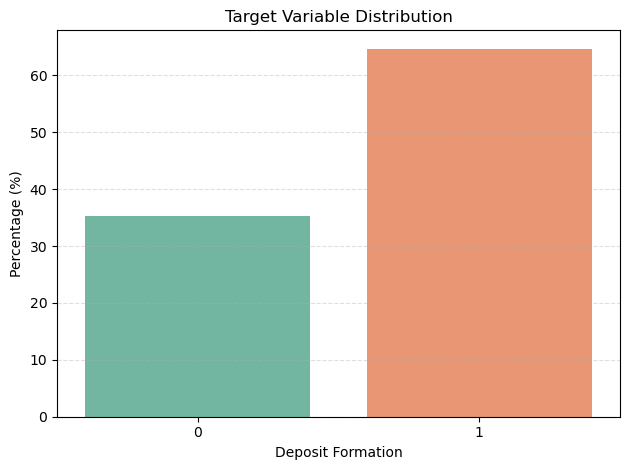

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

sns.countplot(x='y', data=mydata, palette='Set2', stat='percent')
plt.title('Target Variable Distribution')
plt.xlabel('Deposit Formation')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.show()

## Connection of categorical variables with target variable

 Gender vs Revisit Intention

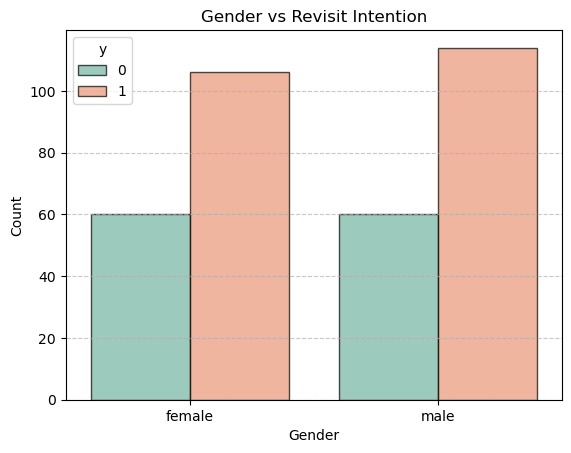

In [8]:
sns.countplot(x='gender', data=mydata, color='blue', edgecolor='k', alpha=0.7, hue='y', palette='Set2')
plt.title('Gender vs Revisit Intention')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Visit Family vs Revisit Intention

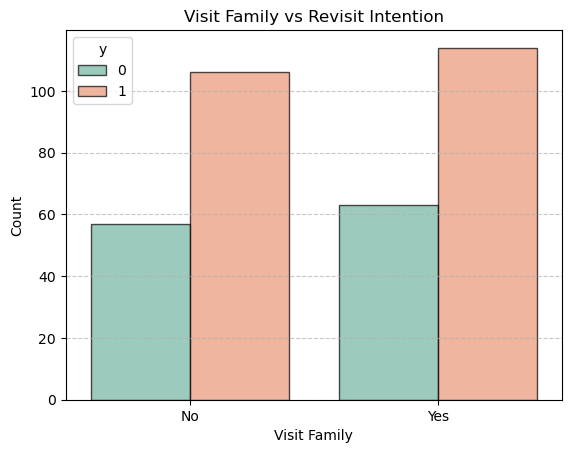

In [9]:
sns.countplot(x='visit_family', data=mydata, color='blue', edgecolor='k', alpha=0.7, hue='y', palette='Set2')
plt.title('Visit Family vs Revisit Intention')
plt.xlabel('Visit Family')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Resident vs Revisit Intention

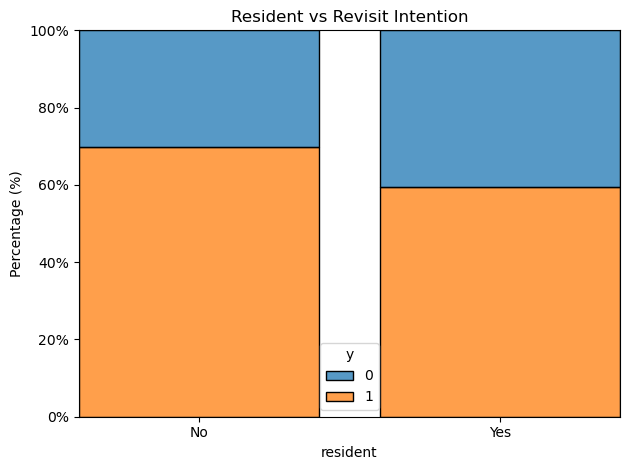

In [10]:
ax = sns.histplot(data=mydata, x='resident', hue='y', multiple='fill', stat='proportion', shrink=0.8)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel('Percentage (%)')
plt.title('Resident vs Revisit Intention')
plt.tight_layout()
plt.show()

## Awerness vs Revisit Intention

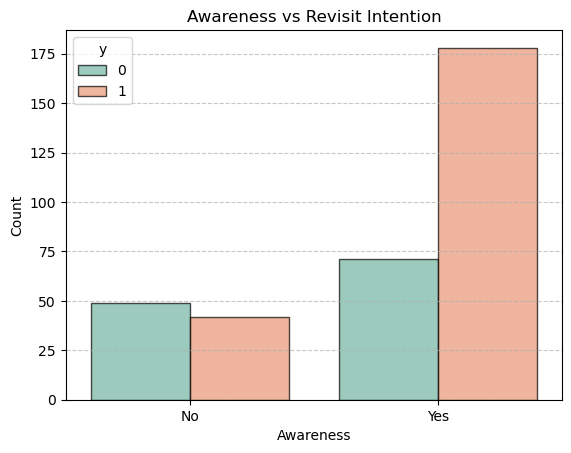

In [11]:
sns.countplot(x='awarness', data=mydata, color='blue', edgecolor='k', alpha=0.7, hue='y', palette='Set2')
plt.title('Awareness vs Revisit Intention')
plt.xlabel('Awareness')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

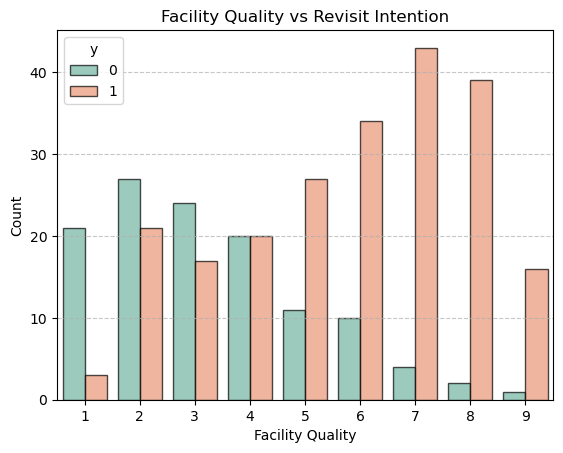

In [12]:
sns.countplot(x='sat_fac', data=mydata, color='blue', edgecolor='k', alpha=0.7, hue='y', palette='Set2')
plt.title('Facility Quality vs Revisit Intention')
plt.xlabel('Facility Quality')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

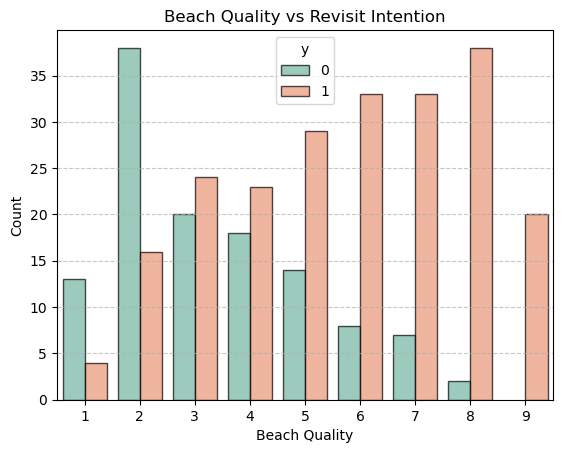

In [13]:
sns.countplot(x='sat_beach', data=mydata, color='blue', edgecolor='k', alpha=0.7, hue='y', palette='Set2')
plt.title('Beach Quality vs Revisit Intention')
plt.xlabel('Beach Quality')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(272, 9) (68, 9)


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [16]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Define category orders for categorical variables
category_order = [
    ['male', 'female'],   # gender
    ['No', 'Yes'],        # visit_family
    ['No', 'Yes'],        # awareness
    ['No', 'Yes'],        # resident
    ['No', 'Yes']         # beach_certification
]

# Create custom OneHotEncoder
encoder = OneHotEncoder(
    categories=category_order,   # Apply specified reference levels
    sparse_output=False,         # Output as dense array
    handle_unknown='ignore',     # Ignore unseen categories
    drop='first'                 # Drop reference category (avoids dummy variable trap)
)


In [17]:
from sklearn.preprocessing import OrdinalEncoder

# Define custom order for ordinal features
ordinal_order = [
    [0, 1, 2, 3],          # education
    list(range(1, 10)),    # cut_bench
    list(range(1, 10))     # cut_fur
]

# Create encoder with manual categories
ordinal_encoder = OrdinalEncoder(categories=ordinal_order)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', encoder, categorical_features),
        ('ord', ordinal_encoder, ordinal_features)
    ])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
rf_pipeline 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(categories=[['male',
                                                                             'female'],
                                                                            ['No',
                                                                             'Yes'],
                                                                            ['No',
                                                                             'Yes'],
                                                                            ['No',
                                                                             'Yes'],
                                                                            ['No',
                                                                             'Yes']],
                                                                drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'visit_family',
                                                   'awarness', 'resident',
                                                   'beach_certifcation']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[[0,
                                                                              1,
                                                                              2,
                                                                              3],
                                                                             [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9],
                                                                             [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9]]),
                                                  ['education', 'sat_beach',
                                                   'sat_fac'])])),
                ('classifier', RandomForestClassifier())])

In [19]:
rf_pipeline.fit(X_train, y_train)
print_score(rf_pipeline, X_train, y_train, X_test, y_test, train=True)
print_score(rf_pipeline, X_train, y_train, X_test, y_test, train=False)



Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    96.0  176.0       1.0      272.0         272.0
_______________________________________________
Confusion Matrix: 
 [[ 96   0]
 [  0 176]]

Test Result:
Accuracy Score: 88.24%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.863636   0.891304  0.882353   0.877470      0.881539
recall      0.791667   0.931818  0.882353   0.861742      0.882353
f1-score    0.826087   0.911111  0.882353   0.868599      0.881103
support    24.000000  44.000000  0.882353  68.000000     68.000000
_______________________________________________
Confusion Matrix: 


In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Pipeline: preprocessing + classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# More conservative hyperparameter grid to reduce overfitting
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__class_weight': [None, 'balanced']  # handle imbalance
}

# StratifiedKFold to preserve class ratios across folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with balanced accuracy
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best Score: 0.910091896407686


Dumping Grid Search Results

In [21]:
import joblib
joblib.dump(grid_search, 'grid_search.joblib')

['grid_search.joblib']

In [22]:
grid_search.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_depth': 5,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 10,
 'classifier__n_estimators': 300}

In [24]:
best_params = grid_search.best_params_
final_rf = RandomForestClassifier(random_state=42, oob_score=True, **{k.replace('classifier__', ''): v for k, v in best_params.items()})

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_rf)
])

final_pipeline.fit(X_train, y_train)

print("OOB Score:", final_pipeline.named_steps['classifier'].oob_score_)

OOB Score: 0.9044117647058824


In [27]:
print_score(final_pipeline, X_train, y_train, X_test, y_test, train=True)
print_score(final_pipeline, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.43%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.940594    0.994152  0.974265    0.967373      0.975249
recall      0.989583    0.965909  0.974265    0.977746      0.974265
f1-score    0.964467    0.979827  0.974265    0.972147      0.974406
support    96.000000  176.000000  0.974265  272.000000    272.000000
_______________________________________________
Confusion Matrix: 
 [[ 95   1]
 [  6 170]]

Test Result:
Accuracy Score: 85.29%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.791667   0.886364  0.852941   0.839015      0.852941
recall      0.791667   0.886364  0.852941   0.839015      0.852941
f1-score    0.791667   0.886364  0.852941   0.839015      0.852941
support    24.000000  44.000000  0.852941  68.000000     68.000000
_____________

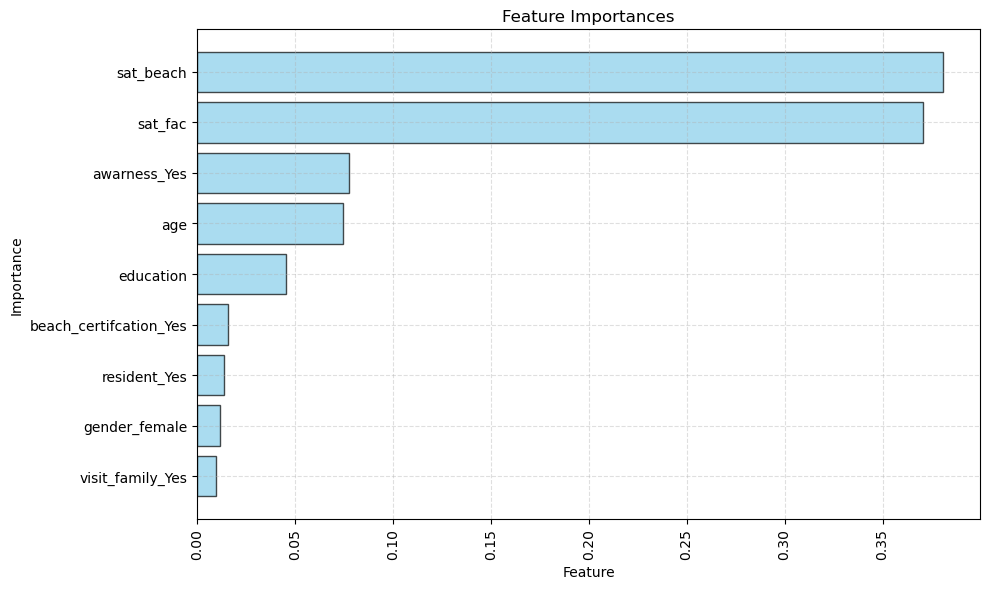

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the full pipeline from GridSearchCV
best_model = grid_search.best_estimator_

# Extract the fitted preprocessor
fitted_preprocessor = best_model.named_steps['preprocessor']

# Extract transformers from preprocessor
num_features = numerical_features
ord_features = ordinal_features

# Get fitted OneHotEncoder from the pipeline
fitted_encoder = fitted_preprocessor.named_transformers_['cat']
cat_features = fitted_encoder.get_feature_names_out(categorical_features)

# Combine all feature names
all_features = list(num_features) + list(cat_features) + list(ord_features)

# Get feature importances from Random Forest
rf_model = best_model.named_steps['classifier']
importances = rf_model.feature_importances_

# Create a DataFrame for importances
feat_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='skyblue', edgecolor='k', alpha=0.7)
plt.gca().invert_yaxis()  # Highest importance on top
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(linestyle='--', alpha=0.4)
plt.show()

## PDP plot

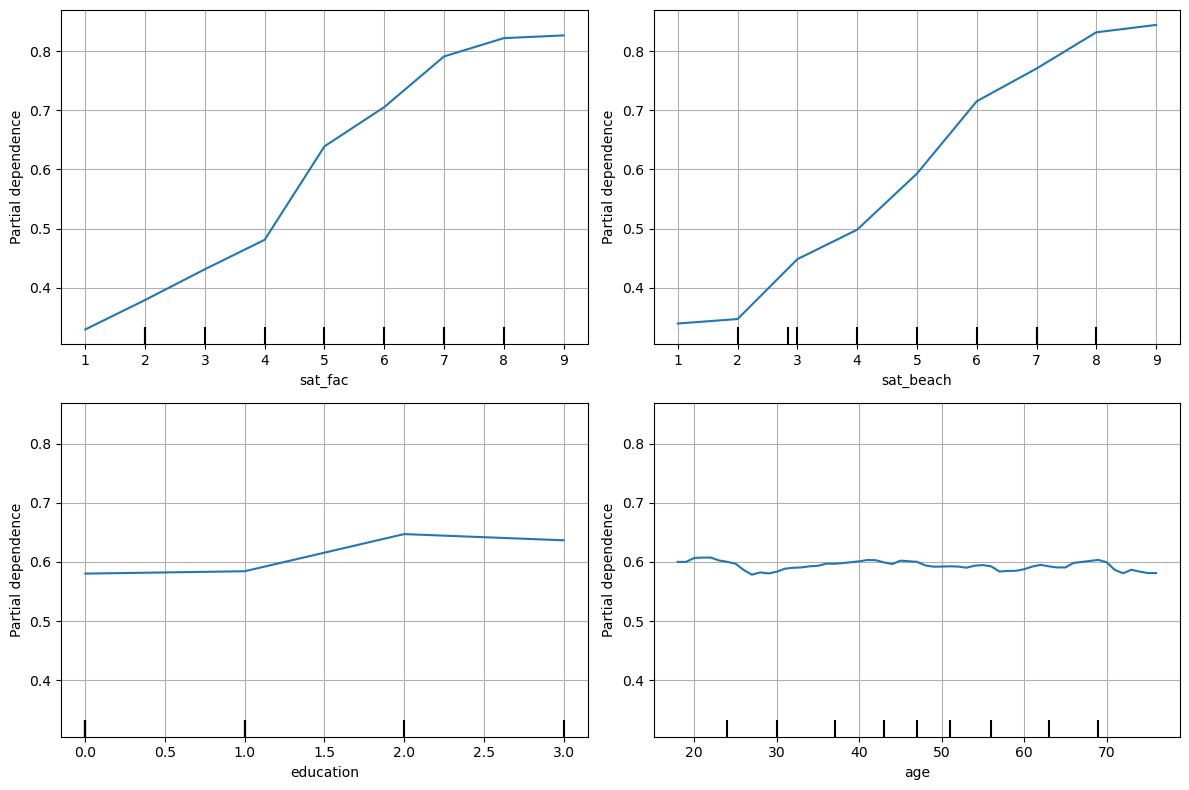

In [38]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

feature_to_plot = ['sat_fac', 'sat_beach', 'education', 'age']

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten()

PartialDependenceDisplay.from_estimator(
    best_model,
    X_train,
    features=feature_to_plot,
    ax=ax
)

# Add grid to each subplot
for a in ax:
    a.grid(True)

plt.tight_layout()
plt.show()

When features are multicollinear, PDP plot wil not give you correct result

X test transformed shape: (68, 9)
SHAP values shape: (68, 9)


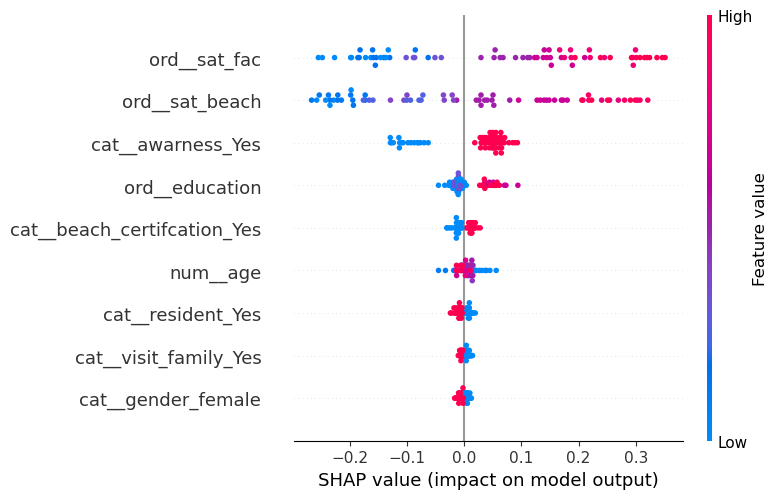

In [39]:
import shap
import matplotlib.pyplot as plt

# 1. Extract fitted model & preprocessor from pipeline
rf_model = best_model.named_steps['classifier']
preprocessor = best_model.named_steps['preprocessor']

# 2. Transform test data into numeric form
X_test_transformed = preprocessor.transform(X_test)
X_train_transformed = preprocessor.transform(X_train)

# 3. Get feature names from preprocessor
feature_names = preprocessor.get_feature_names_out()

# 4. Build SHAP TreeExplainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_transformed)

# 5. Handle 3D SHAP array (samples, features, classes)
if isinstance(shap_values, list):
    # usual case: List of arrays
    values_to_plot = shap_values[1]  # class 1 revisit
else:
    # your case: 3D array
    values_to_plot = shap_values[:, :, 1]  # take class 1 slice

print("X test transformed shape:", X_test_transformed.shape)
print("SHAP values shape:", values_to_plot.shape)

# 6. Summary plot
shap.summary_plot(values_to_plot, features=X_test_transformed, feature_names=feature_names)

## SHAP dependence plot

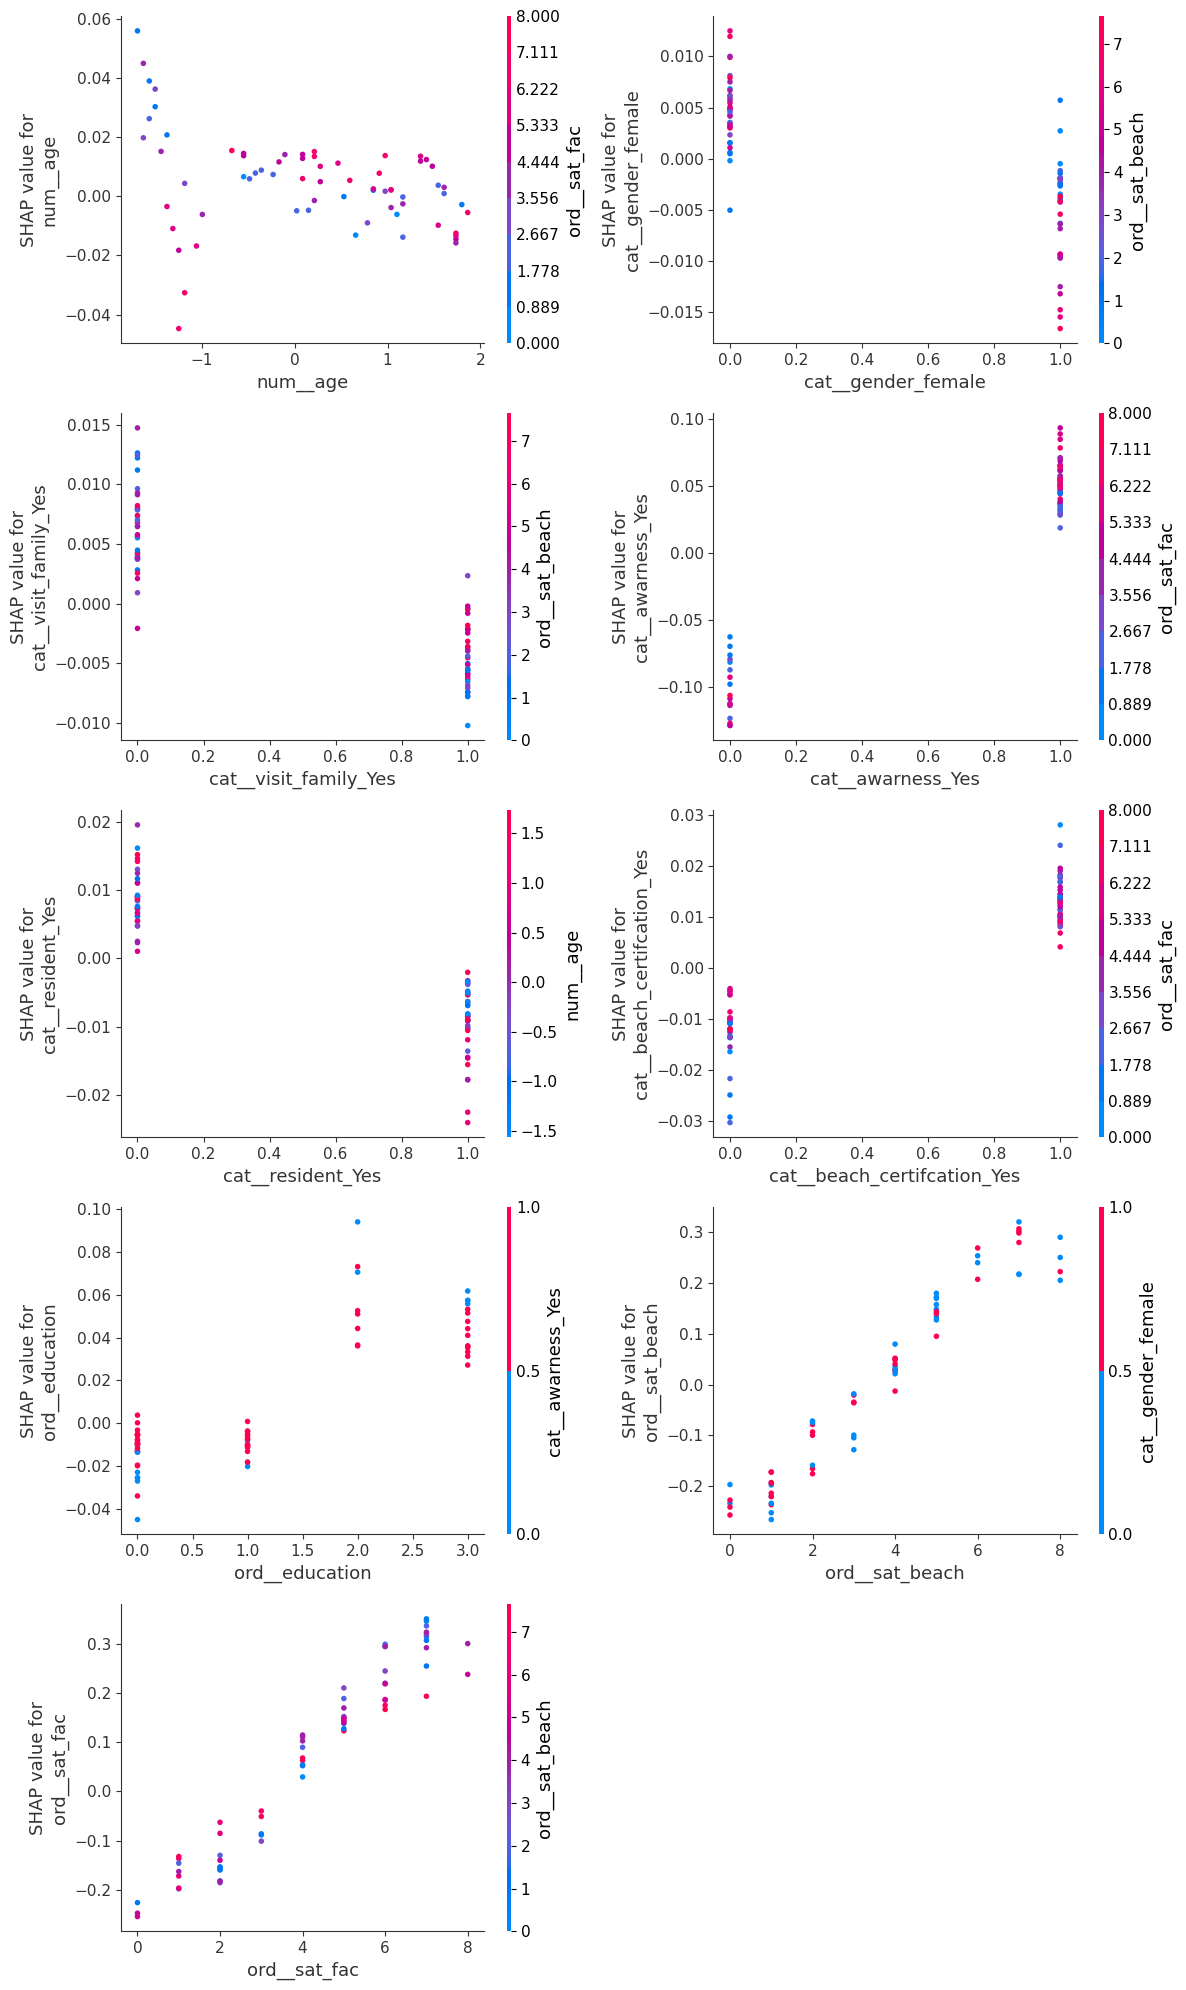

In [40]:
# Assuming you have 14 features
n_features = len(feature_names)
n_cols = 2  # number of columns in subplot grid
n_rows = (n_features + n_cols - 1) // n_cols  # calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
axes = axes.flatten()  # flatten in case of more than 1 row

for i, feature in enumerate(feature_names):
    shap.dependence_plot(
        ind=feature,
        shap_values=values_to_plot,
        features=X_test_transformed,
        feature_names=feature_names,
        interaction_index='auto',
        ax=axes[i],  # assign subplot axis
        show=False  # don't show each plot separately
    )

# Remove any empty subplots if feature count < n_rows*n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Build calibrated version of the model using CalibratedClassifierCV

In [41]:
from sklearn.calibration import CalibratedClassifierCV

# Extract preprocessor & classifier from your pipeline
preprocessor = best_model.named_steps['preprocessor']
rf_clf = best_model.named_steps['classifier']

# Wrap the Random Forest Classifier with calibration
calibrated_rf = CalibratedClassifierCV(
    estimator=rf_clf,
    method='sigmoid',
    cv=5  # You can specify the number of folds for cross-validation
)

# New pipeline with calibrated classifier
calibrated_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', calibrated_rf)
])

# Fit on training data
calibrated_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(categories=[['male',
                                                                             'female'],
                                                                            ['No',
                                                                             'Yes'],
                                                                            ['No',
                                                                             'Yes'],
                                                                            ['No',
                                                                             'Yes'],
                                                                            ['No',
                                                                             'Yes']],
                                                                drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'visit_family',
                                                   'awarness', 'resident',
                                                   'beach_certifcation']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[[0,
                                                                              1,
                                                                              2,
                                                                              3],
                                                                             [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9],
                                                                             [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9]]),
                                                  ['education', 'sat_beach',
                                                   'sat_fac'])])),
                ('classifier',
                 CalibratedClassifierCV(cv=5,
                                        estimator=RandomForestClassifier(class_weight='balanced',
                                                                         max_depth=5,
                                                                         min_samples_leaf=2,
                                                                         min_samples_split=10,
            

In [42]:
## get calibrated probabilities
y_proba_cal = calibrated_model.predict_proba(X_test)[:, 1]  # Probability of positive class

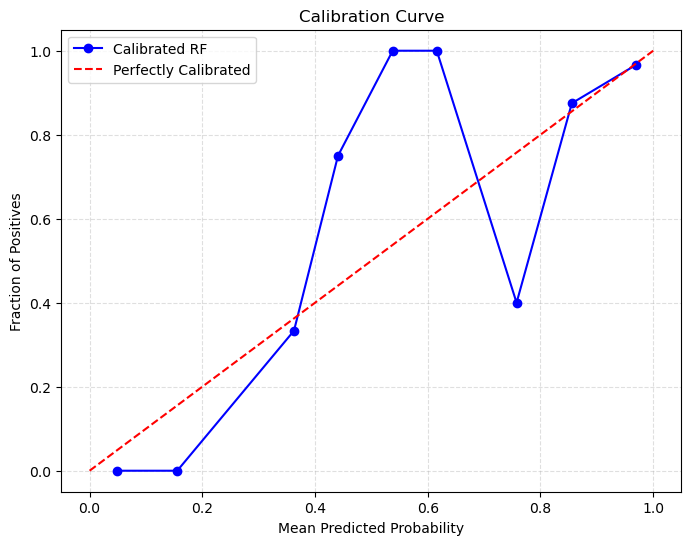

In [43]:
## plot calibration curve
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
prob_true, prob_pred = calibration_curve(y_test, y_proba_cal, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated RF', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated', color='red')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.grid(linestyle='--', alpha=0.4)
plt.show()